Encoded shape: (119390, 1177)
ndim: 2
Top 15 singular values: [790.35 308.99 256.93 250.88 222.99 205.28 167.77 157.17 149.32 137.83
 133.78 118.78 117.45 112.28 107.56]


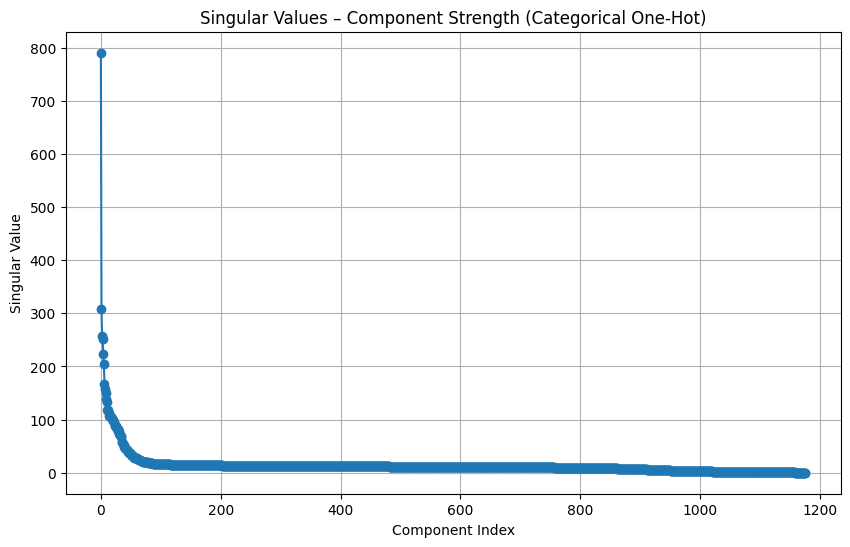

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
url = "https://raw.githubusercontent.com/swapnilsaurav/Dataset/master/hotel_bookings.csv"
df = pd.read_csv(url)

# Select categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
df_cat = df[cat_cols].fillna("Missing")

# -----------------------------
# OneHotEncoder (version-safe)
# -----------------------------
try:
    # New sklearn (1.2+)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
except TypeError:
    # Old sklearn (<1.2)
    encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

X_encoded = encoder.fit_transform(df_cat)

print("Encoded shape:", X_encoded.shape)
print("ndim:", X_encoded.ndim)

# -----------------------------
# SVD
# -----------------------------
U, S, Vt = np.linalg.svd(X_encoded, full_matrices=False)

print("Top 15 singular values:", np.round(S[:15], 2))

# -----------------------------
# Visualize component strength
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(S, marker="o")
plt.title("Singular Values – Component Strength (Categorical One-Hot)")
plt.xlabel("Component Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()
